In [1]:
import cv2
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import subprocess
import os

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [28]:
test_attack = os.listdir('../imgDataset/test/attack')
test_normal = os.listdir('../imgDataset/test/normal')
train_attack = os.listdir('../imgDataset/train/attack')
train_normal = os.listdir('../imgDataset/train/normal')
test_attack.sort()
test_normal.sort()
train_attack.sort()
train_normal.sort()

In [29]:
print('Testset_attack :', len(os.listdir('../imgDataset/test/attack')))
print('Testset_normal :', len(os.listdir('../imgDataset/test/normal')))
print('Trainset_attack :', len(os.listdir('../imgDataset/train/attack')))
print('Trainset_normal :', len(os.listdir('../imgDataset/train/normal')))

Testset_attack : 299
Testset_normal : 494
Trainset_attack : 1206
Trainset_normal : 1737


(128, 128)


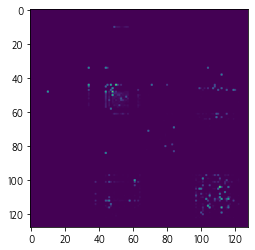

In [19]:
img = cv2.imread('../imgDataset/test/attack/attack_0001.png', 0)
plt.imshow(img)
print(img.shape)

In [33]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_directory(
    "../imgDataset/train/",
    target_size=(128, 128),
    class_mode='binary',
    batch_size=16
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    "../imgDataset/train/",
    target_size=(128, 128),
    class_mode='binary',
    batch_size=16
)

Found 2943 images belonging to 2 classes.
Found 2943 images belonging to 2 classes.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [38]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_20 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 42, 42, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 42, 42, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 56448)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               28901888  
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)              

In [40]:
epochs=3
history = model.fit(
    train_generator, 
    epochs=epochs,
    steps_per_epoch=274
)

Epoch 1/3
 98/274 [=========>....................] - ETA: 1:38 - loss: 0.6509 - accuracy: 0.7103

UnknownError:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f854fa6ee30>
Traceback (most recent call last):

  File "/usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/tensorflow/python/ops/script_ops.py", line 244, in __call__
    ret = func(*args)

  File "/usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/tensorflow/python/autograph/impl/api.py", line 302, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 827, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 814, in wrapped_generator
    for data in generator_fn():

  File "/usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 940, in generator_fn
    yield x[i]

  File "/usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/keras_preprocessing/image/iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/keras_preprocessing/image/iterator.py", line 230, in _get_batches_of_transformed_samples
    interpolation=self.interpolation)

  File "/usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/keras_preprocessing/image/utils.py", line 114, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "/usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/PIL/Image.py", line 2931, in open
    "cannot identify image file %r" % (filename if filename else fp)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f854fa6ee30>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_13280]

Function call stack:
train_function
